<a href="https://colab.research.google.com/github/aiswarya-sureshkumar/Handwritten-Digit-Classification-using-FNN/blob/main/Handwritten%20Digit%20Classification%20using%20FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [52]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [53]:
x_train.shape

(60000, 28, 28)

In [54]:
x_test.shape

(10000, 28, 28)

In [55]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

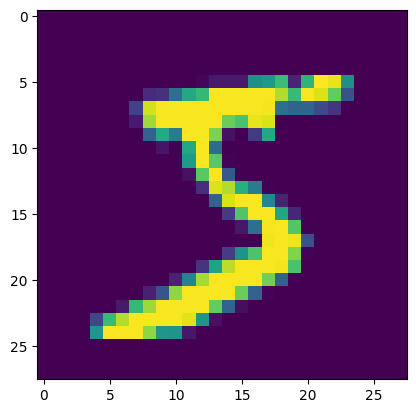

In [56]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [57]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [58]:
# To bring pixel values to 0 to 1 range (divide each pixel with max pixel value)
x_train=x_train/255
x_test=x_test/255

In [59]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [79]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))   # to covert images with size 28x28 into 1D
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [80]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
# If categorical crossentropy is taken, then one hot encoding must be done
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [95]:
history=model.fit(x_train,y_train,batch_size=32,epochs=30,validation_split=0.20)

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0840 - accuracy: 0.9772 - val_loss: 0.1089 - val_accuracy: 0.9690
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0818 - accuracy: 0.9780 - val_loss: 0.1083 - val_accuracy: 0.9687
Epoch 3/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0798 - accuracy: 0.9781 - val_loss: 0.1057 - val_accuracy: 0.9697
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0775 - accuracy: 0.9789 - val_loss: 0.1056 - val_accuracy: 0.9704
Epoch 5/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0756 - accuracy: 0.9794 - val_loss: 0.1048 - val_accuracy: 0.9688
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0738 - accuracy: 0.9797 - val_loss: 0.1040 - val_accuracy: 0.9687
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0718 - accuracy: 0.9803 - val_loss: 0.1021 - val_accuracy:

In [83]:
y_prob=model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [84]:
y_pred=y_prob.argmax(axis=1)

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.969

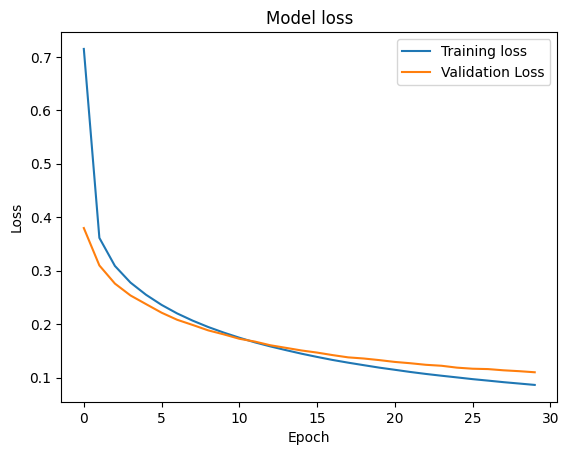

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss','Validation Loss'])
plt.show()

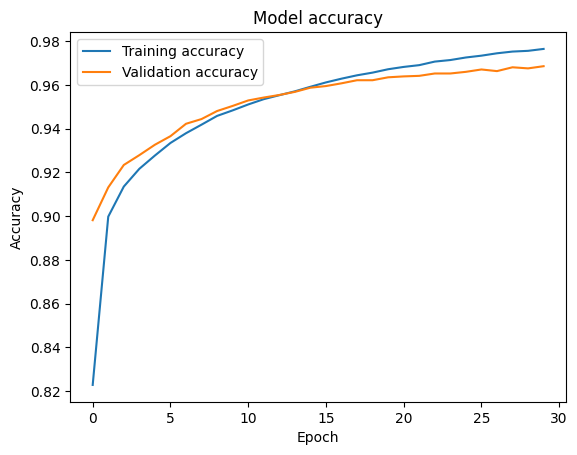

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy','Validation accuracy'])
plt.show()

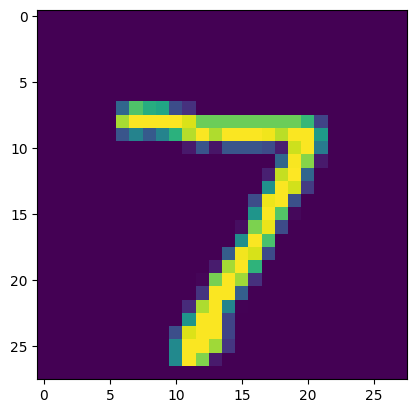

In [89]:
plt.imshow(x_test[0])

In [90]:
model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 34ms/step


array([7])

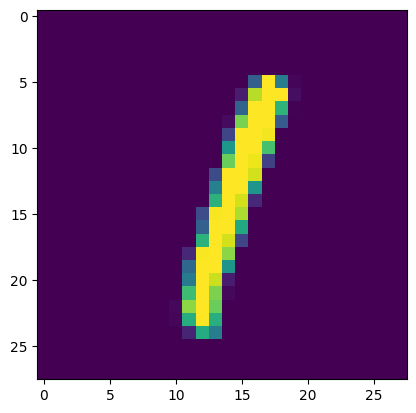

In [91]:
plt.imshow(x_test[5])

In [92]:
model.predict(x_test[5].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 21ms/step


array([1])

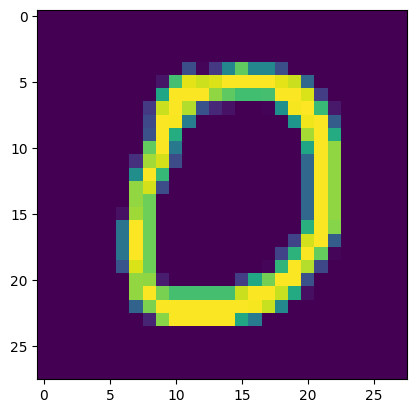

In [93]:
plt.imshow(x_test[10])

In [94]:
model.predict(x_test[10].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 30ms/step


array([0])